*2018 CFA Level 2 Study Session 3 Reading 9* is an introduction to covariance, linear regression, and scatter plots. For ease I've broken these up in several parts, with part 1 exploring scatter plots and correlation coefficients. The math for this lesson can be handled using either numpy or pandas, and the plotting from matplotlib. As the complexity of the examples increase, we bring in real world data using pandas-datareader to illustrate the examples.

Note: to properly view this notebook, ensure that "show output" is selected from the dropdown, and if you want to see the wizard behind the curtain, click "show code".

---
**Scatter Plots**

In [1]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib, datetime
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
pd.set_option('display.max_rows', 10)

Example 1-1 concerns **scatter plots**, with a some money supply rate and an inflation rate, with the following data:

In [2]:
df = pd.DataFrame({"Country":["A","B","C","D","E","F"], "MoneySupplyGrthRate":[0.06851,0.11601,0.05751,0.10501,0.12501,0.13501], "InflationRate":[0.05451,0.07761,0.03491,0.07351,0.08251,0.10761]})
#df['InflationRate'] = df.MoneySupplyGrthRate + np.random.uniform(-1,1)
df

Country  InflationRate  MoneySupplyGrthRate
0       A        0.05451              0.06851
1       B        0.07761              0.11601
2       C        0.03491              0.05751
3       D        0.07351              0.10501
4       E        0.08251              0.12501
5       F        0.10761              0.13501

With the resulting scatter plot:

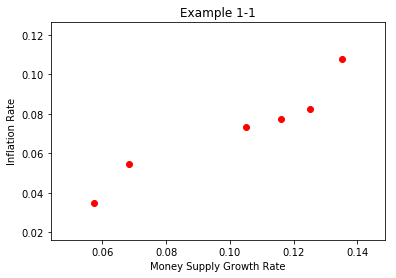

In [3]:
figure()
plt.scatter(df.MoneySupplyGrthRate,df.InflationRate,c='r')
xlabel('Money Supply Growth Rate')
ylabel('Inflation Rate')
title('Example 1-1')
show()

**Correlation analysis** describes the relationship between two data series using a * *single number* * , the **correlation coefficient**, as measured from -1 to +1, with 0 being perfectly uncorrelated. The following graphs demonstrate this effect.

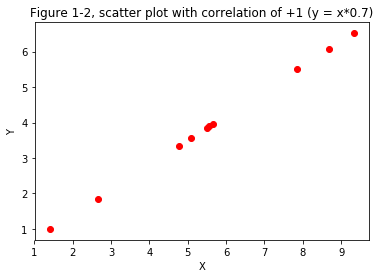

In [4]:
figure()
x = np.random.uniform(1,10,10);
y = x*0.7;
plt.scatter(x,y,c='r')
xlabel('X')
ylabel('Y')
title('Figure 1-2, scatter plot with correlation of +1 (y = x*0.7)')
show()

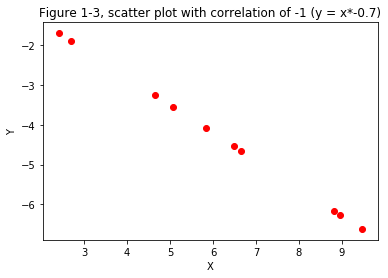

In [5]:
figure()
x = np.random.uniform(1,10,10);
y = x*-0.7;
plt.scatter(x,y,c='r')
xlabel('X')
ylabel('Y')
title('Figure 1-3, scatter plot with correlation of -1 (y = x*-0.7)')
show()

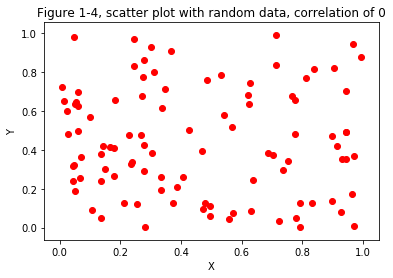

In [6]:
figure()
x = np.random.uniform(0,1,100);
y = np.random.uniform(0,1,100);
plt.scatter(x,y,c='r')
xlabel('X')
ylabel('Y')
title('Figure 1-4, scatter plot with random data, correlation of 0')
show()

Note that Figure 1-4 is perfectly random, no correlation, and the value of X tells us nothing about the value of Y, etc.

---
**Calculating and Interpreting Correlation Coefficient / Covariance**

$$Sample \space covariance = Cov (X,Y) = \sum_{n}^{i=1} \frac{(X_i - \overline{X})(Y_i - \overline{Y})}{(n-1)}$$

where:
n = sample size

$X_i = i$th observation of variable X

$\overline{X}$ = mean observations of variable X

$Y_i = i$th observation of variable Y

$\overline{Y}$ = mean observations of variable X

On the **HP 12c calculator**, correlation coefficient is generated when you use the $\boxed{\hat{y},r}$ key after entering your data pairs into the statistics registers, but is kept in the Y register, so use the $\boxed{X \lessgtr Y}$ key to show the coefficient. (see the HP 12c Platinum manual pg 97)

The formula for the (Pearson) **correlation coefficient** is given as follows: 
$$Correlation \space coefficient = r = \frac{Cov(X,Y)}{s_x s_y}$$
where $s_x$ is the standard deviation (recall, the standard deviation is the square root of the variance) of $X$, and $s_y$ is the standard deviation of $Y$. 
In this way, you can multiply $r$ as calculated by your financial calculator by $s_x s_y$ to arrive at the covariance. 

Using **Pandas**, calculating the covariance, variance, and correlation coefficient is straight forward, as each series has a method for each. Using the initial dataframe as an example

In [7]:
print("Covariance: ",df.MoneySupplyGrthRate.cov(df.InflationRate)) #covariance

Covariance:  0.000747046666667


In [8]:
print("variance X: ",df.MoneySupplyGrthRate.var()) #variance X

variance X:  0.0009842666666666667


In [9]:
print("variance Y: ",df.InflationRate.var()) #variance Y

variance Y:  0.0006187106666666666


In [10]:
print("Correlation coefficient: ",df.MoneySupplyGrthRate.corr(df.InflationRate)) #correlation coefficient

Correlation coefficient:  0.957298860219


The long way to do this, as described in the text, is to innumerate the table to calculate  the cross product and the squared deviations...

The (Pearson's) correlation coefficient 

In [11]:
df['CrossProduct']=(df.MoneySupplyGrthRate - df.MoneySupplyGrthRate.mean())*(df.InflationRate-df.InflationRate.mean())
df['SquaredDeviationsX'] = (df.MoneySupplyGrthRate - df.MoneySupplyGrthRate.mean())**2
df['SquaredDeviationsY'] = (df.InflationRate-df.InflationRate.mean())**2
df

Country  InflationRate  MoneySupplyGrthRate  CrossProduct  \
0       A        0.05451              0.06851      0.000564   
1       B        0.07761              0.11601      0.000087   
2       C        0.03491              0.05751      0.001610   
3       D        0.07351              0.10501      0.000007   
4       E        0.08251              0.12501      0.000256   
5       F        0.10761              0.13501      0.001212   

   SquaredDeviationsX  SquaredDeviationsY  
0            0.001067            0.000298  
1            0.000220            0.000034  
2            0.001907            0.001359  
3            0.000015            0.000003  
4            0.000568            0.000115  
5            0.001145            0.001284

In [12]:
covariance = df.CrossProduct.sum()/(len(df.CrossProduct)-1) #sum of cross products / n-1
varX = df.SquaredDeviationsX.sum()/(len(df.SquaredDeviationsX)-1) #sum of squared deviations / n-1
varY = df.SquaredDeviationsY.sum()/(len(df.SquaredDeviationsY)-1) #sum of squared deviations / n-1
corrcoeff = covariance/((varX**0.5)*(varY**0.5))
print("Covariance: ", covariance,"\nVarX: ", varX,"\nVarY: ", varY, "\nCorrelation Coefficient", corrcoeff)


Covariance:  0.0007470466666666667 
VarX:  0.0009842666666666667 
VarY:  0.0006187106666666666 
Correlation Coefficient 0.9572988602190073


still relatively easy, but unnecessary given Pandas' built in methods. It's important to note that the correlation coefficient formula given here by CFAI is the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Other options available to the [Pandas method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html#pandas.Series.corr) are the [Kendall Tau correlation coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), and the [Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

---
**Limitations**

* It's important to understand that correlation, measured this way, measures *linear* relationships. For example, let's revisit figure 1-2 again, but also look at exponentials. In figure 1-2, I used a random sequence from numpy as the X variable, and used the equation $y = 5+3.5x$ for the Y column, which is a linear relationship. Let's make Z a quadratic, using the equation $z = (3+x)^{2}$. For simplicity we will do this in a pandas dataframe:

In [13]:
x = np.random.uniform(-100,100,20);
y = 5+(3.5*x);
z = (3+x)**2
df1_2a = pd.DataFrame({"X":x,"Y":y,"Z":z})
df1_2a

X           Y            Z
0   85.284563  303.495969  7794.164003
1  -12.394837  -38.381928    88.262957
2   23.291763   86.521169   691.256784
3   80.094586  285.331053  6904.710296
4  -38.749728 -130.624048  1278.043045
..        ...         ...          ...
15   7.620688   31.672409   112.799018
16  54.713177  196.496120  3330.810810
17  47.175449  170.114072  2517.575703
18  39.438109  143.033380  1800.993070
19 -67.475748 -231.165117  4157.122040

[20 rows x 3 columns]

with the resulting graph:

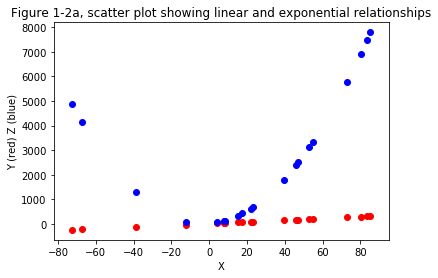

Correlation coefficient X to Y (red):  1.0 
 Correlation coefficient X to Z (blue):  0.438640512754


In [14]:
figure()
plt.scatter(df1_2a.X,df1_2a.Y,c='r')
plt.scatter(df1_2a.X,df1_2a.Z,c='b')
xlabel('X')
ylabel('Y (red) Z (blue)')
title('Figure 1-2a, scatter plot showing linear and exponential relationships')
show()
print("Correlation coefficient X to Y (red): ",df1_2a.X.corr(df1_2a.Y), 
      "\n Correlation coefficient X to Z (blue): ",df1_2a.X.corr(df1_2a.Z))

The Pearson's correlation coefficient for x:z is expected to be low, because the parabola is not easily explained with a line, as shown by the correlation coefficient near 0 (uncorrelated).

*Note* if we only take the right or left half of the parabola, the correlation coefficient is quite good, as the relationship appears somewhat linear. Consider price data - the prices will always be positive. So, if using real prices in a correlation, regardless if it is an exponential it might have a linear-looking correlation. On the other hand, if the dataset contains positive and negative values (such as daily or weekly price changes), the correlation would diminish with an exponential function. For example, take only the right side (positive) data:  

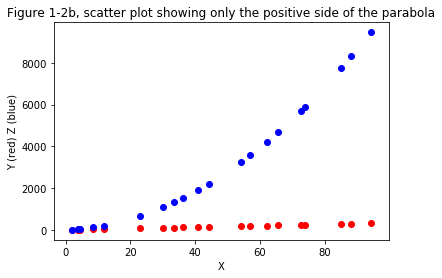

Correlation X-Z (blue dots): 0.966096670835


In [15]:
x = np.random.uniform(0,100,20);
y = 5+(3.5*x);
z = (3+x)**2
df1_2b = pd.DataFrame({"X":x,"Y":y,"Z":z})
figure()
plt.scatter(df1_2b.X,df1_2b.Y,c='r')
plt.scatter(df1_2b.X,df1_2b.Z,c='b')
xlabel('X')
ylabel('Y (red) Z (blue)')
title('Figure 1-2b, scatter plot showing only the positive side of the parabola')
show()
print("Correlation X-Z (blue dots):",df1_2b.X.corr(df1_2b.Z))

Additionally, odd numbered power functions are likely to return higher correlations, such as $z = (3+x)^{3}$

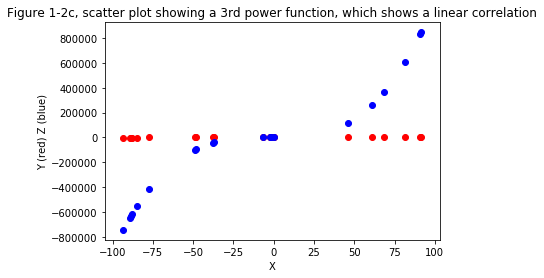

Correlation X-Z (blue dots): 0.956656779826


In [16]:
x = np.random.uniform(-100,100,20);
y = 5+(3.5*x);
z = (3+x)**3
df1_2c = pd.DataFrame({"X":x,"Y":y,"Z":z})
figure()
plt.scatter(df1_2c.X,df1_2c.Y,c='r')
plt.scatter(df1_2c.X,df1_2c.Z,c='b')
xlabel('X')
ylabel('Y (red) Z (blue)')
title('Figure 1-2c, scatter plot showing a 3rd power function, which shows a linear correlation')
show()
print("Correlation X-Z (blue dots):",df1_2c.X.corr(df1_2c.Z))

* The text also suggests that data with outliers are unlikely to correlate well, and uses a scatter plot of monthly S&P 500 returns and monthly US inflation rate, 1990-2013. This data is also fairly easy to pull from Python using "pandas-datareader". We will use SPY as a proxy for the S&P 500, with data provided by Google going back to 2001:

In [17]:
start = datetime.datetime(2001,2,1) #using SPY as a proxy for S&P 500, Google's data starts Feb 5th 2001.
end = datetime.datetime(2017,1,1)
CPIAUSCL = data.DataReader("CPIAUCSL", "fred", start, end)
#note to self, the key to the data here refers to the URL at the FRED.
#CPIAUSCL comes from this url: https://fred.stlouisfed.org/series/CPIAUCSL
#which stands for Consumer Price Index for All Urban Consumers.
SPY_monthly = data.get_data_google('SPY', start=start, end=end).resample('MS').first() 
#get the google data, resample the dates to the start of the month so they match the FRED data
SPY_monthly.rename(columns={'Close':'SPYClose'}, inplace=True) #rename the column
CPI_SPY = CPIAUSCL.join(SPY_monthly.SPYClose, how='left') #merge the two datasets
#as percent change. 
CPI_SPYpct = CPI_SPY.pct_change().dropna() #change to percent, and drop the N/A values
CPI_SPYpct

CPIAUCSL  SPYClose
DATE                          
2001-03-01  0.000568 -0.082407
2001-04-01  0.001704 -0.083467
2001-05-01  0.005102  0.112522
2001-06-01  0.002256 -0.002519
2001-07-01 -0.001688 -0.020516
...              ...       ...
2016-08-01  0.002047  0.033441
2016-09-01  0.002567  0.002074
2016-10-01  0.002855 -0.007406
2016-11-01  0.002089 -0.022106
2016-12-01  0.002568  0.040567

[190 rows x 2 columns]

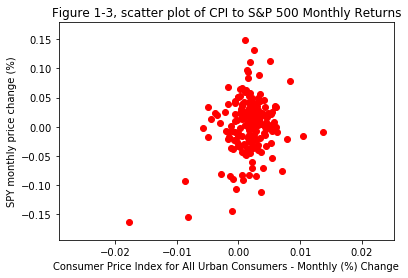

Pearson Correlation Coefficient: 0.259480023502


In [18]:
#plotted:
figure()
plt.scatter(CPI_SPYpct.CPIAUCSL,CPI_SPYpct.SPYClose,c='r')
xlabel('Consumer Price Index for All Urban Consumers - Monthly (%) Change')
ylabel('SPY monthly price change (%)')
title('Figure 1-3, scatter plot of CPI to S&P 500 Monthly Returns')
show()
print("Pearson Correlation Coefficient:",CPI_SPYpct.CPIAUCSL.corr(CPI_SPYpct.SPYClose))

The data appears to have no linear relationship, however the correlation coefficient of implies a weak relationship. The outliers are probably giving more of the appearance of a linear trend than actually exists. The text goes on to hypothesize about possible relationships between stock market returns and CPI. I would add that as CPI is a lagging indicator, it might be more fruitful to lag the CPI by one month when correlating to returns. One must be very cautious when analyzing datasets like these, however, as it can be very easy to fall prey to datamining biases, or other **spurious correlations**. 

Even with random data, it's possible to find correlations which are meaningless. To illustrate this point, here is a code which loops random data until it finds a correlation of greater than 0.7:

In [24]:
i = 0
while i < 1000: #simple loop which keeps generating random data until it correlates
    x = np.random.uniform(-100,100,20)
    y = np.random.uniform(-100,100,20)
    df1_4 = pd.DataFrame({"X":x,"Y":y})
    if df1_4.X.corr(df1_4.Y)>0.7 :
        break
df1_4

X          Y
0   99.134156  97.346280
1  -12.903767 -18.980361
2  -32.201309  47.345598
3  -82.943989 -84.006622
4  -49.518923  31.442232
..        ...        ...
15 -49.940656   7.841045
16  25.165204 -11.878464
17  76.105833  57.769843
18  78.111467  99.380815
19 -64.191333 -85.345219

[20 rows x 2 columns]

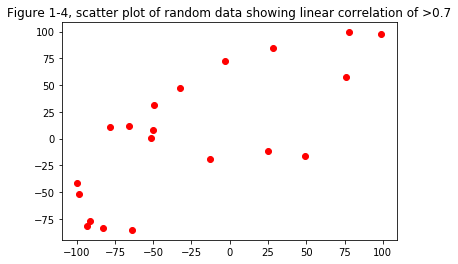

Pearson Correlation Coefficient: 0.744161187014


In [25]:
figure()
plt.scatter(df1_4.X,df1_4.Y,c='r')
title('Figure 1-4, scatter plot of random data showing linear correlation of >0.7')
show()
print("Pearson Correlation Coefficient:",df1_4.X.corr(df1_4.Y))

---
**Testing the Significance of the Correlation Coefficient:**
We want to know whether our correlation (null hypothesis) is actually 0 ( $H_0 : p = 0$ ) and our alternate hypothesis is the correlation is not 0 ( $H_a : p \ne 0$ ). As we learned in level 1, the T-test is a good way to evaluate the significance of a correlation, so for this we will use a 2-tailed T-test statistic.

$$t-stat = \frac{\overline{X}-\mu_0}{\frac{s}{\sqrt{n}}} $$

however, we aren't working with sample mean data in this case. The institute provides this formula: 

$$ t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}} $$

*the origin of which is somewhat uncertain.*

The decision rule for using this formula is that we reject $H_0$ if the $ |\text{t-stat}| $ exceeds $ |\text{t-critical}| $

Using this formula with our example 1-4 we come up with a test statistic of: 

In [26]:
(df1_4.X.corr(df1_4.Y)*(df1_4.shape[0]-2)**0.5)/(1-df1_4.X.corr(df1_4.Y)**2)**0.5

4.7263593980386664

And using a student's T-table, at the 0.05 threshold our T-critical is 2.1009. Since the test statistic is greater than the critical value, we can reject the null hypothesis of no correlation at the 5% significance level.

The institute notes that with a sufficient population given a certain r value, it should be able to just meet the t-critical. Let's test this by modifying our random data loop slightly to reject the null hypothesis with a low correlation coefficient, something that you wouldn't want to trade on. Let's give it a correlation coefficient of 0.35, but while rejecting the null hypothesis. We'll go with a population of n=32 (degrees of freedom = 30). At the 5% significance level (0.05), our t-critical is 2.046, so we can run the loop until our t-stat rejects the null hypothesis like so:

In [45]:
i = 0
while i < 1: #simple loop which keeps generating random data until it correlates
    x = np.random.uniform(-100,100,32)
    y = np.random.uniform(-100,100,32)
    df1_5 = pd.DataFrame({"X":x,"Y":y})
    if abs(df1_5.X.corr(df1_5.Y)) < 0.35 and abs(((df1_5.X.corr(df1_5.Y)*(df1_5.shape[0]-2)**0.5)/(1-df1_5.X.corr(df1_5.Y)**2)**0.5)) > 2.046 :
        break
df1_5

X          Y
0   95.323739 -99.714708
1  -84.754452  44.099240
2   55.086953 -84.587189
3  -16.187571 -56.174989
4  -44.815103  72.410018
..        ...        ...
27  -1.495417  83.584759
28 -50.451061 -19.430034
29  -5.673247 -15.951552
30 -24.521747  66.110319
31  48.693688 -59.352024

[32 rows x 2 columns]

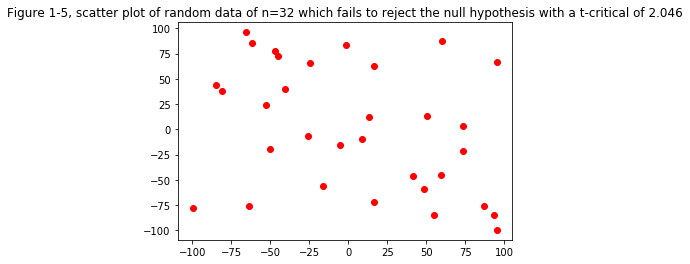

Pearson Correlation Coefficient: -0.349978477298 
T-stat :  -2.04632530115


In [46]:
figure()
plt.scatter(df1_5.X,df1_5.Y,c='r')
title('Figure 1-5, scatter plot of random data of n=32 which fails to reject the null hypothesis with a t-critical of 2.046')
show()
print("Pearson Correlation Coefficient:",df1_5.X.corr(df1_5.Y), 
     "\nT-stat : ",(df1_5.X.corr(df1_5.Y)*(df1_5.shape[0]-2)**0.5)/(1-df1_5.X.corr(df1_5.Y)**2)**0.5)

As you can see, the scatter plot appears meaningless - but we've successfully rejected our null hypothesis! 

This goes to show that you can lie with statistics. With our two examples we have found signals in the noise which are both 'statistically significant' based on two polulations fo random data. 

These tools are a good starting point for evaluating relationships in datasets, but are limited and must be applied correctly to have meaning.

---

Going forward, it is important to remember that statistics is a very deep field of study, and python contains a great wealth of statistics packages and modules. Be sure to check the assumptions of every module before you use it.

In part 2 we will look at linear regression!